In [1]:
import numpy as np
from scipy import linalg as lin
from scipy import integrate as odesolver
import scipy as sci
import math as m
import matplotlib.pyplot as plt
from sympy import *
import time

In [2]:
def euler_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        # y[i] = y[i-1] + h*f(x[i-1],y[i-1]);
        Y[:,i] = Y[:,i-1] + h*F(x[i-1],Y[:,i-1]);

    return Y;

def rk2_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+h,Y[:,i-1]+h*k1);

        Y[:,i] = Y[:,i-1] + (h/2)*(k1+k2);

    return Y;

def rk4_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k1);
        k3 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k2);
        k4 = F(x[i-1]+h,Y[:,i-1]+h*k3);

        Y[:,i] = Y[:,i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return Y;

def calc_erro_2(x,h,y,f_exa):
    e = np.abs(y-f_exa(x));
    e = e**2;
    erro = np.sqrt(h*np.sum(e))

    return erro;

In [3]:
# Exemplo equação de ordem 2
# y'' = 4y' - 3y - x
# Y = [y1,y2] e F = [y2,4y2-3y1-x]; 
# Solução exata y(x) = 1/9 (-3 x + 18 e^x - 5 e^(3 x) - 4)

F = lambda x,Y: np.array([Y[1],4*Y[1]-3*Y[0]-x]);
f_exa = lambda x: (1/9)*(-3*x + 18*np.exp(x) - 5*np.exp(3*x) - 4);

Y0 = np.array([1,0])
h = 0.1;
n = int((2-0)/h);
x = np.linspace(0,2,n+1,endpoint=True);

Y_euler = euler_sys(x,h,F,Y0);
Y_rk2 = rk2_sys(x,h,F,Y0);
Y_rk4 = rk4_sys(x,h,F,Y0);

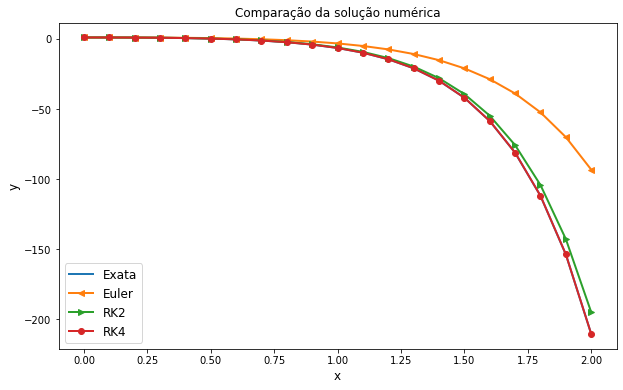

In [4]:
# Vamos plotar os resultados
plt.figure(figsize=(10,6),facecolor='white')
plt.plot(x,f_exa(x),label = 'Exata',linewidth = 2)
plt.plot(x,Y_euler[0,:],label = 'Euler',linewidth = 2,marker='<')
plt.plot(x,Y_rk2[0,:],label = 'RK2',linewidth = 2,marker='>')
plt.plot(x,Y_rk4[0,:],label = 'RK4',linewidth = 2,marker='o')
plt.xlabel('x',fontsize='large') 
plt.ylabel('y',fontsize='large') 
plt.title('Comparação da solução numérica') 
plt.legend(fontsize='large') 
plt.show()


In [5]:
# Cálculo de erros
erro_euler = calc_erro_2(x,h,Y_euler[0,:],f_exa);
erro_rk2 = calc_erro_2(x,h,Y_rk2[0,:],f_exa);
erro_rk4 = calc_erro_2(x,h,Y_rk4[0,:],f_exa);

print('\nErro euler: %.6e'%(erro_euler));
print('Erro RK2: %.8e'%(erro_rk2));
print('Erro RK4: %.6e'%(erro_rk4));


Erro euler: 5.273589e+01
Erro RK2: 6.90777929e+00
Erro RK4: 3.138741e-02
